In [1]:
#Code cell# 1

#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob,os
import cv2
%matplotlib inline

In [2]:
#Code cell# 2
# Loading images for calibration
cwd = os.getcwd()
Images=[]
file_names=[]
os.chdir("./camera_cal")
#importing images required for camera calibration
for file in glob.glob("*.jpg"):
    file_names.append(file)
    Images.append( mpimg.imread(file))
    
os.chdir(cwd)

    

In [3]:
#Code cell# 3
#finding corners in a chess image and extracting the coordinates of corners
objp=np.zeros((9*6,3), np.float32)
objp[:,:2]=np.mgrid[0:9,0:6].T.reshape(-1,2)

objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


for img in Images:

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        

In [10]:
#Code cell# 4

#undistorts the disorted image by calculating calibration matrices 
def undistort(image,show_images=0):
    #calculate calibration matrices from real world points in (z=0 plane) and 2d points of chess corners
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
    undistorted_image=cv2.undistort(image, mtx, dist, None, mtx)
    if show_images:
        f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
        ax1.imshow(image)
        ax1.set_title("Original image",fontsize=20)        
        
        os.chdir("./myoutput")
        image=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite("original_image_of_road.jpg",image)
        image=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax2.imshow(undistorted_image)
        undistorted_image=cv2.cvtColor(undistorted_image, cv2.COLOR_RGB2BGR)
        ax2.set_title("Undistorted image image",fontsize=20)                
        cv2.imwrite("undistorted_image_of_road.jpg",undistorted_image)
        undistorted_image=cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB)
        
        os.chdir(cwd)    



    return undistorted_image

# find a transformation of coorinates from src to dst 
def perspective(image, show_images=0):
    src = np.float32([[550,470],[790, 460],
                      [160, 720],[1250, 720]])
    dst = np.float32([[0, 0], [1280, 0], 
                     [0, 720],[1280, 720]])
    
    #transformation which maps points in src to dst 
    transformation_matrix = cv2.getPerspectiveTransform(src, dst)
    #inverse transformation which maps points in dst to src 
    Minv = cv2.getPerspectiveTransform( dst,src)
    warped_image=cv2.warpPerspective(image,transformation_matrix,(image.shape[1],image.shape[0]))

    if show_images==1:
        f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
        f.tight_layout()
        os.chdir("./myoutput")
        
        ax1.imshow(image)
        ax1.plot((src[0])[0],(src[0])[1],'*')
        ax1.plot((src[1])[0],(src[1])[1],'*')    
        ax1.plot((src[2])[0],(src[2])[1],'*')    
        ax1.plot((src[3])[0],(src[3])[1],'*')    
        ax1.set_title("Points selected for warping",fontsize=15)        
        ax1.axis('off')
        
        image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        cv2.imwrite("Points_selected_for_warping.jpg",image)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ax2.imshow(warped_image)
        ax2.plot((dst[0])[0],(dst[0])[1],'*')
        ax2.plot((dst[1])[0],(dst[1])[1],'*')    
        ax2.plot((dst[2])[0],(dst[2])[1],'*')    
        ax2.plot((dst[3])[0],(dst[3])[1],'*')   
        ax2.set_title("Warped Image",fontsize=15)
        ax2.axis('off')

        warped_image=cv2.cvtColor(warped_image, cv2.COLOR_RGB2BGR)
        cv2.imwrite("warped_image.jpg",warped_image)
        warped_image=cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB)

        os.chdir(cwd)    
    
    return warped_image,Minv


    

# Camera Calibration

### 1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

The code for this step is contained in the 4 th code cell of the IPython notebook located in 

I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image. Thus, objp is just a replicated array of coordinates, and objpoints will be appended with a copy of it every time I successfully detect all chessboard corners in a test image. imgpoints will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.

I then used the output objpoints and imgpoints to compute the camera calibration and distortion coefficients using the cv2.calibrateCamera() function. I applied this distortion correction to the test image using the cv2.undistort() function and obtained this result:

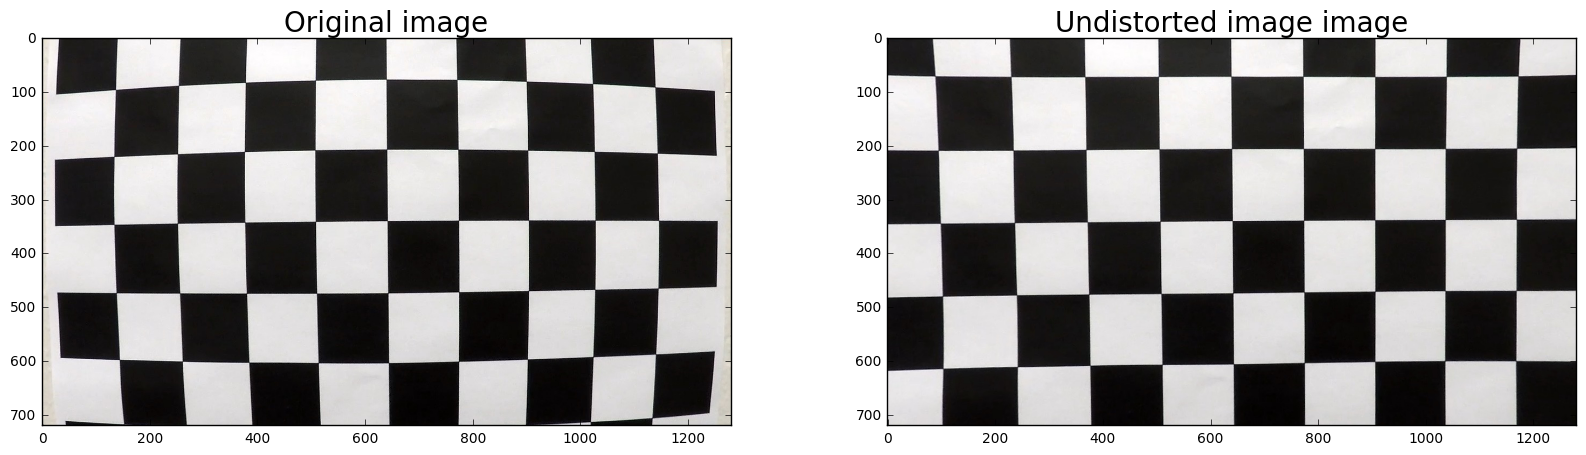

In [6]:
#Code cell# 5
image=Images[7]
undist=undistort(image,1)


In [7]:
#Code cell# 6
files = glob.glob('./test_images/test*.jpg')
test_images=[]
for file in files:
    test_images.append( mpimg.imread(file))
  
    


## Pipeline (single images)



### 1. Provide an example of a distortion-corrected image.



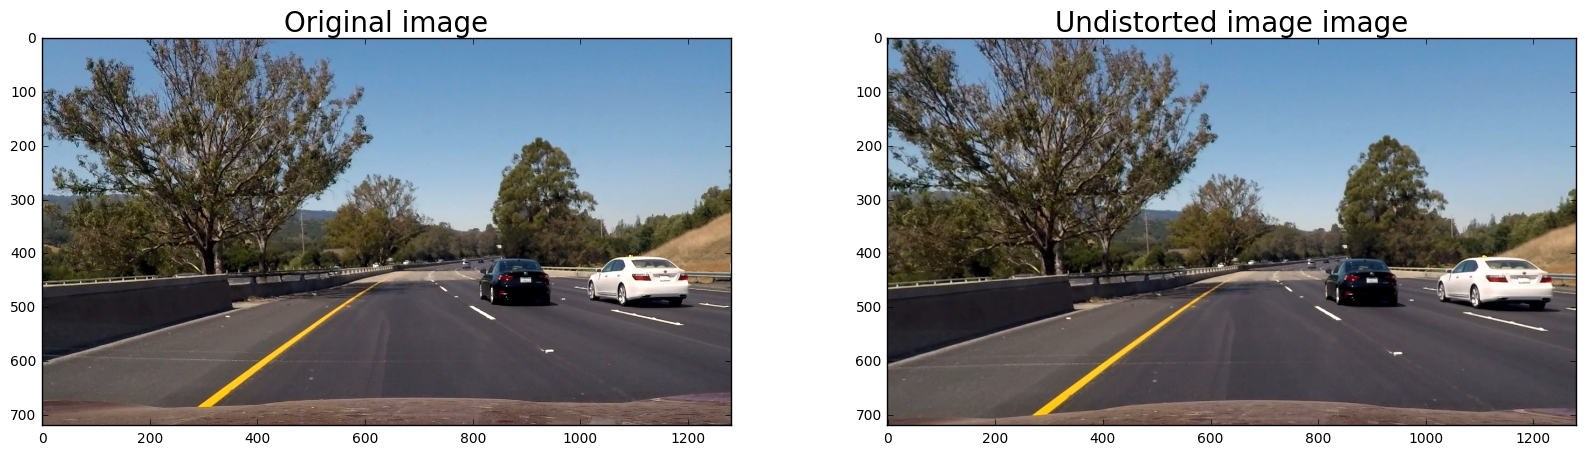

In [8]:
#Code cell# 7
os.chdir(cwd)
image=test_images[4]
undist=undistort(image,1)

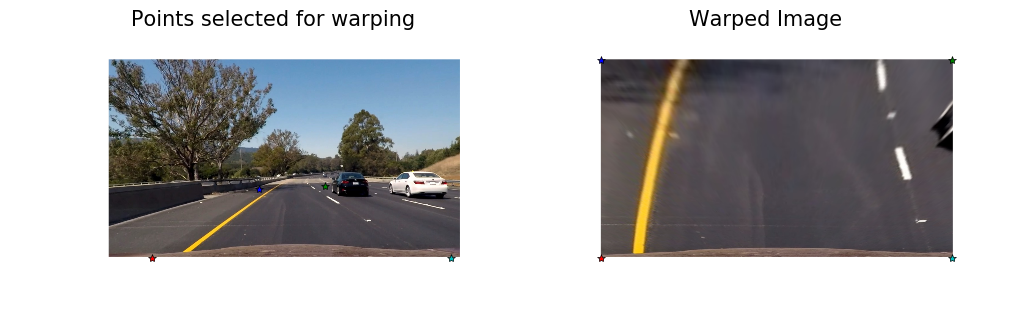

In [11]:
#Code cell# 8
os.chdir(cwd)
img,Minv=perspective(undist,1)

### 2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result.

I used a combination of l,s  channels in HLS and b channel in Lab  (thresholding steps at lines # through # in another_file.py). Here's an example of my output for this step. (note: this is not actually from one of the test images)




/home/ubuntu/Desktop/project4/CarND-Advanced-Lane-Lines
/home/ubuntu/Desktop/project4/CarND-Advanced-Lane-Lines/myoutput


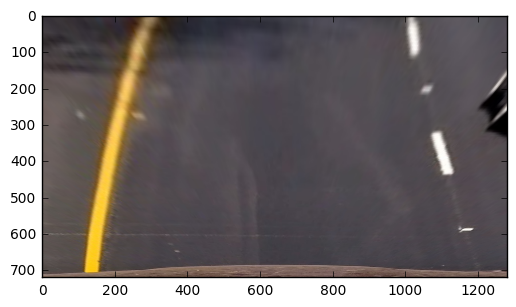

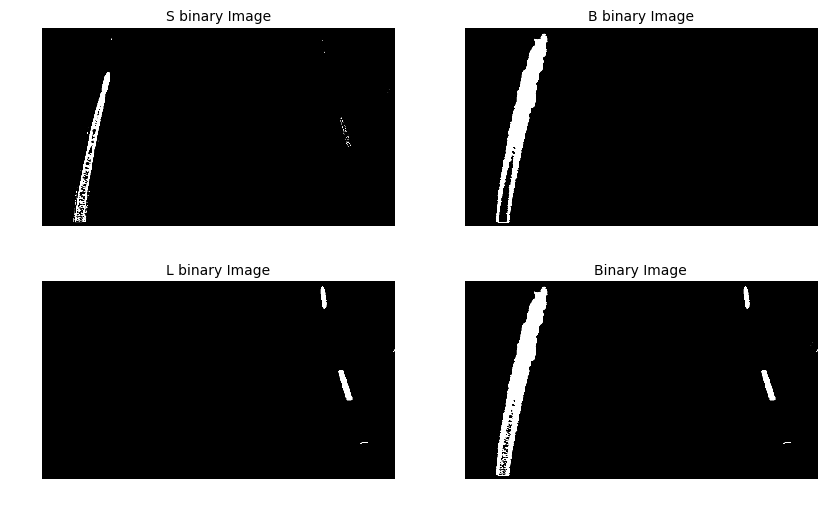

In [54]:
#Code cell # 9
os.chdir(cwd)
print(cwd)
os.chdir("./myoutput")
print(os.getcwd())
plt.imshow(img)
cv2.imwrite("del.jpg",img[:,:,1])
plt.show()
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,6))



l_channel = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:,:,1]

l_binary = np.zeros_like(l_channel)
l_min=215
l_max=255
#appllying a threshold range to l channel in HLS to detect lines
l_binary[(l_channel>l_min) & (l_channel<l_max)]=255


s_channel = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:,:,2]

s_binary = np.zeros_like(s_channel)
s_min=170
s_max=255
#appllying a threshold range to S channel in HLS to detect lines
s_binary[(s_channel>s_min) & (s_channel<s_max)]=255

b_channel = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)[:,:,2]
b_thresh_min = 155
b_thresh_max = 200
b_binary = np.zeros_like(b_channel)
#appllying a threshold range to B channel in LAB to detect lines
b_binary[(b_channel >= b_thresh_min) & (b_channel <= b_thresh_max)] = 255

binary_warped=np.zeros_like(b_channel)
binary_warped[(l_binary==255)|(s_binary==255)|(b_binary==255) ]=255


ax1.imshow(s_binary,cmap='gray')
ax1.set_title("S binary Image",fontsize=10)
ax1.axis('off')
cv2.imwrite("S_binary_Image.jpg",s_binary)


ax2.imshow(b_binary,cmap='gray')
ax2.set_title("B binary Image",fontsize=10)
ax2.axis('off')

cv2.imwrite("B_binary_Image.jpg",b_binary)



ax3.imshow(l_binary,cmap='gray')
ax3.set_title("L binary Image",fontsize=10)
ax3.axis('off')

cv2.imwrite("L_binary_Image.jpg",l_binary)



ax4.imshow(binary_warped,cmap='gray')
ax4.set_title("Binary Image",fontsize=10);
ax4.axis('off');

cv2.imwrite("binary_warped.jpg",binary_warped)



os.chdir(cwd)





### 3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

The code for my perspective transform includes a function called 'perspective', which appears in __________ in the 
file   The perspective() function takes as inputs an image('imgage') which is usually undistorted. The function itself has source(src) and destination(dst) points predefined. I chose the hardcode the source and destination points in the following manner:

```python
src = np.float32([[550,470],[790, 460],
                      [160, 720],[1250, 720]])
dst = np.float32([[0, 0], [1280, 0], 
                     [0, 720],[1280, 720]])
                     
```
<pre>



In [56]:
#Code cell# 10
histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]

#leftx = np.append(leftx, leftx_int)

lefty = nonzeroy[left_lane_inds]

#lefty = np.append(lefty, 720)


rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)

left_fitx = left_fit[0]*lefty**2 + left_fit[1]*lefty + left_fit[2]

right_fit = np.polyfit(righty, rightx, 2)
right_fitx = right_fit[0]*righty**2 + right_fit[1]*righty + right_fit[2]

y_eval = np.max(lefty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

#plt.plot(leftx, lefty, color='yellow')
#plt.plot(rightx, righty, color='yellow')




/home/ubuntu/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


3726.56814606 3566.37020622


In [50]:
#Code cell# 11
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')



667.700966474 m 26302.6558367 m


(720, 0)

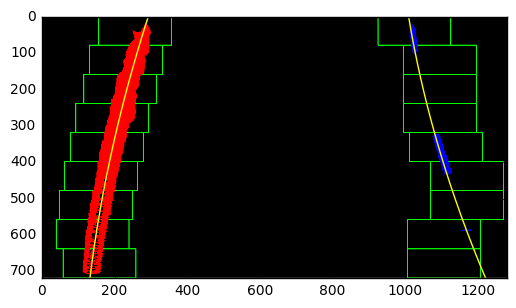

In [109]:
#Code cell# 12
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )

left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

num_rows=binary_warped.shape[0]

plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')


plt.xlim(0, 1280)
plt.ylim(720, 0)


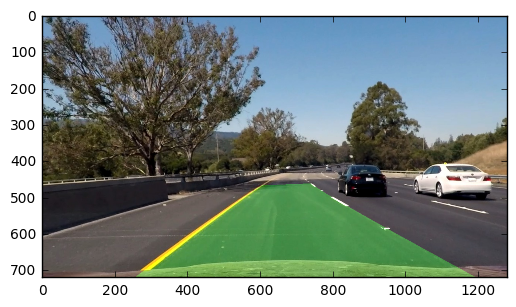

In [113]:
#Code cell# 13
#Create an image to draw the lines on
#warped=binary_warped
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()

pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])



pts = np.hstack((pts_left, pts_right))
# Draw the lane onto the warped blank image

cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))


plt.imshow(color_warp)

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)
result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
cv2.imwrite("lane_area_filled.jpg",result)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)




In [9]:
#Code cell# 15
class  Left_Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        
class Right_Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

In [14]:
#Code cell# 16
def process_vid(image):
    
    show=0
    
    undist=undistort(image)
    img,Minv=perspective(undist)

    
    l_min=225
    l_max=255
    s_min=170
    s_max=255
    b_min = 155
    b_max = 200

    
    l_channel = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:,:,1]
    s_channel = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:,:,2]
    b_channel = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)[:,:,2]
    
    l_binary = np.zeros_like(l_channel)
    s_binary = np.zeros_like(s_channel)
    b_binary = np.zeros_like(b_channel)    
    binary_warped=np.zeros_like(b_channel)
    
    l_binary[(l_channel>= l_min) & (l_channel<= l_max)]=1
    s_binary[(s_channel>= s_min) & (s_channel<= s_max)]=1
    b_binary[(b_channel>= b_min) & (b_channel<= b_max)]=1

    binary_warped[(l_binary==1)|(b_binary==1) ]=1
    #print("binary_warped.shape",binary_warped.shape)

    if show:
        f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
        ax1.imshow(img)
        ax2.imshow(binary_warped,cmap='gray')

    #_________________________________________________________________________________________

    if not Left.detected:
        #print("if")
        histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)
        # Create an output image to draw on and  visualize the result
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines
        midpoint = np.int(histogram.shape[0]/2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        # Choose the number of sliding windows
        nwindows = 9
        # Set height of windows
        window_height = np.int(binary_warped.shape[0]/nwindows)
        # Identify the x and y positions of all nonzero pixels in the image
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base
        # Set the width of the windows +/- margin
        margin = 100
        # Set minimum number of pixels found to recenter window
        minpix = 50
        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []

        # Step through the windows one by one
        for window in range(nwindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = binary_warped.shape[0] - (window+1)*window_height
            win_y_high = binary_warped.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin
            # Draw the windows on the visualization image
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)
            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

        # Concatenate the arrays of indices
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)

        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]

        #leftx = np.append(leftx, leftx_int)

        lefty = nonzeroy[left_lane_inds]

        #lefty = np.append(lefty, 720)


        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds] 

        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)

        left_fitx = left_fit[0]*lefty**2 + left_fit[1]*lefty + left_fit[2]

        right_fit = np.polyfit(righty, rightx, 2)
        right_fitx = right_fit[0]*righty**2 + right_fit[1]*righty + right_fit[2]
        
        
            
        
        
        y_eval = np.max(lefty)
        left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
        right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
        if show:
            print(left_curverad, right_curverad)



        #___________________________________________________________________________________________



        ym_per_pix = 30/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/700 # meters per pixel in x dimension

        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
        if show:
            print(left_curverad, 'm', right_curverad, 'm')

        #___________________________________________________________________________________________


        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
        """
        #extra
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)
        #extra        

        """
        if show:
            out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
            out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
            plt.imshow(out_img)
            plt.plot(left_fitx, ploty, color='yellow')
            plt.plot(right_fitx, ploty, color='yellow')
            plt.xlim(0, 1280)
            plt.ylim(720, 0)

        
        #___________________________________________________________________________________________


        # Create an image to draw the lines on
        #warped=binary_warped
        warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
        
        # Recast the x and y points into usable format for cv2.fillPoly()
        #pts_left = np.array([np.transpose(np.vstack([left_fitx, lefty]))])
        #pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, righty])))])

        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])


        pts = np.hstack((pts_left, pts_right))
        # Draw the lane onto the warped blank image

        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
        
        ###########################################
        num_rows=binary_warped.shape[0]

        midpoint=left_fit[0]*num_rows**2 + left_fit[1]*num_rows + left_fit[2] + right_fit[0]*num_rows**2 + right_fit[1]*num_rows + right_fit[2]

        midpoint=int(midpoint/2)

        midp_warped=np.array(([midpoint],[num_rows],[1]))
        midp_unwarped_homogeous=np.matmul(Minv,midp_warped)

        pixels_off_the_center=abs(int(midp_unwarped_homogeous[0]/midp_unwarped_homogeous[2])-640)
        meters_off_the_center=pixels_off_the_center*(3.7/700)

        
        

        #plt.imshow(color_warp)

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
        # Combine the result with the original image
        result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
        if show:
            1
        #plt.imshow(result)
        
        
        Left.current_fit=left_fit
        Right.current_fit=right_fit
        Left.detected=True
        Right.detected=True        
    
    else:
        
        #print("else")
        
        
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

        left_fit=Left.current_fit
        right_fit=Right.current_fit
        
        plt.imshow(binary_warped,cmap='gray')
        
        nonzero = binary_warped.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        margin = 100
        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

        # Again, extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        
        
        
        ym_per_pix = 30/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/700 # meters per pixel in x dimension

        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        y_eval = np.max(lefty)
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        
        
        
        
        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        
        Left.current_fit=left_fit
        Right.current_fit=right_fit
        
        
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
        
        
        """
        plt.imshow(out_img)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)

        """
        
        
        
        
        warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        # Recast the x and y points into usable format for cv2.fillPoly()
        #pts_left = np.array([np.transpose(np.vstack([left_fitx, lefty]))])
        #pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, righty])))])

        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])


        pts = np.hstack((pts_left, pts_right))
        # Draw the lane onto the warped blank image

        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

        #plt.imshow(color_warp)

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        
        midpoint=left_fit[0]*num_rows**2 + left_fit[1]*num_rows + left_fit[2] + right_fit[0]*num_rows**2 + right_fit[1]*num_rows + right_fit[2]

        midpoint=int(midpoint/2)

        midp_warped=np.array(([midpoint],[num_rows],[1]))
        midp_unwarped_homogeous=np.matmul(Minv,midp_warped)

        pixels_off_the_center=abs(int(midp_unwarped_homogeous[0]/midp_unwarped_homogeous[2])-640)
        meters_off_the_center=pixels_off_the_center*(3.7/700)


        
        
        
        newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
        # Combine the result with the original image
        result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
        #plt.imshow(result)
            
       
    if midpoint > 640:
        cv2.putText(result, 'Vehicle is {:.2f}m left of center'.format(meters_off_the_center), (100,80),
                     fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 2)
    else:
        cv2.putText(result, 'Vehicle is {:.2f}m right of center'.format(meters_off_the_center), (100,80),
                 fontFace = 16, fontScale = 2, color=(255,255,255), thickness = 2)
            
    cv2.putText(result, 'Radius of Curvature {}(m)'.format(left_curverad), (120,140),fontFace = 16
                , fontScale = 2, color=(255,255,255), thickness = 2)
        
        
        
    return result
        

In [12]:
Left=Left_Line()
Right=Right_Line()
a=process_vid(test_images[1])
plt.imshow(a)

NameError: name 'Left_Line' is not defined

In [13]:
a=process_vid(test_images[1])
plt.imshow(a)

/home/ubuntu/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NameError: name 'num_rows' is not defined

In [ ]:
from moviepy.editor import VideoFileClip
Left=Left_Line()
Right=Right_Line()

video_output = 'result.mp4'
clip1 = VideoFileClip("../project_video.mp4")
white_clip = clip1.fl_image(process_vid) 
white_clip.write_videofile(video_output, audio=False)




[MoviePy] >>>> Building video result.mp4
[MoviePy] Writing video result.mp4


100%|█████████▉| 1260/1261 [31:06<00:01,  1.41s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: result.mp4 

